In [12]:
import matplotlib.pyplot as plt
import numpy as np
import struct
from array import array
import os
from os.path  import join
import random
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

import torchvision
from torchvision import datasets

from torchvision import transforms

In [13]:
train_data = datasets.MNIST(root="./Data",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor()) # do we want to transform the data as we download it? 

# Get the MNIST test dataset
test_data = datasets.MNIST(root="./Data",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor()) 

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9.91M/9.91M [00:25<00:00, 384kB/s] 


Extracting ./Data\MNIST\raw\train-images-idx3-ubyte.gz to ./Data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 197kB/s]


Extracting ./Data\MNIST\raw\train-labels-idx1-ubyte.gz to ./Data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1.65M/1.65M [00:24<00:00, 67.8kB/s]


Extracting ./Data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./Data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting ./Data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./Data\MNIST\raw



In [14]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./Data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./Data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:

len(train_data), len(test_data)

(60000, 10000)

In [16]:

# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [17]:
print(f"Label:\n {label}")


Label:
 5


In [18]:

# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")
     

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


In [19]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image_squeeze shape: torch.Size([28, 28])


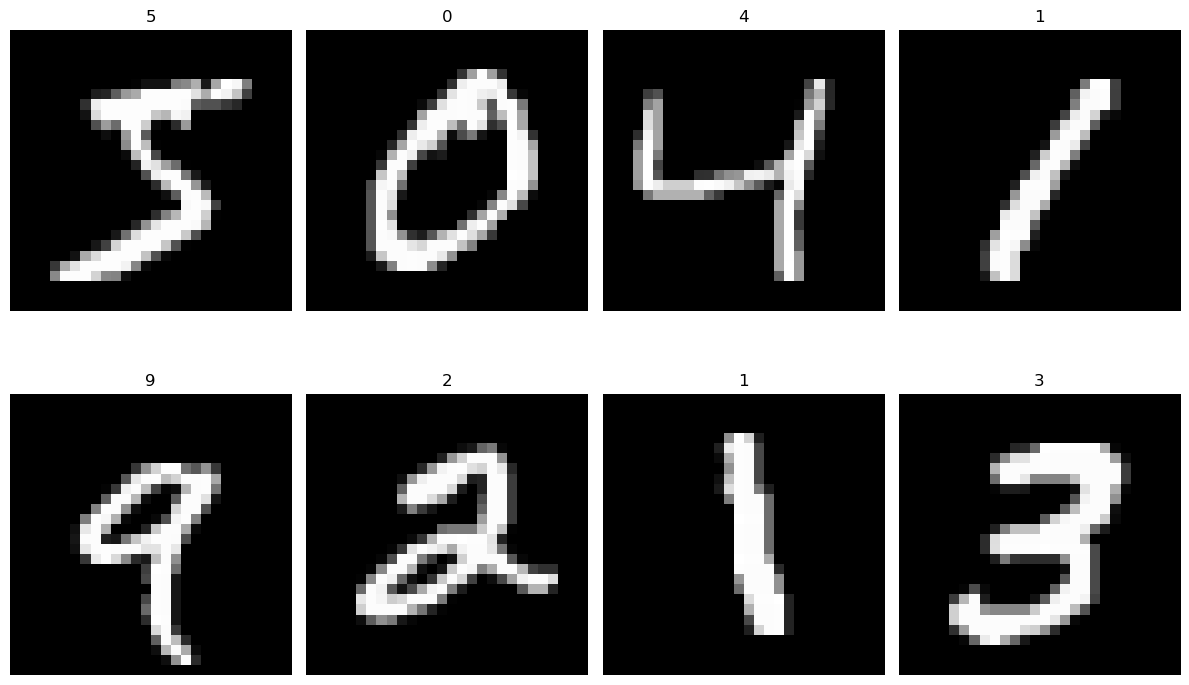

In [28]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
fig, axes = plt.subplots(2, 4, figsize=(12, 8))  # 2 rows and 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i in range(8):
    img = train_data[i][0]
    print(f"Image shape: {img.shape}")
    
    # Squeeze only if necessary
    img_sq = img.squeeze() if img.ndim > 2 else img
    print(f"Image_squeeze shape: {img_sq.shape}")
    
    label = train_data[i][1]
    
    # Display the image in the appropriate subplot
    axes[i].imshow(img_sq, cmap='gray')
    axes[i].set_title(label)
    axes[i].axis('off')  # Hide the axes

# Hide any unused subplots
for j in range(5, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [30]:
train_dataloader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=32,shuffle=False)

In [31]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [32]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [55]:
class MNISTModel(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,out_features=output_shape),

        )
    
    def forward(self,X):
        X=self.conv_block_1(X)
        X=self.conv_block_2(X)
        X=self.classifier(X)
        return X

In [56]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [57]:
model=MNISTModel(1,10,10).to(device)
model

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [58]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.3280,  0.1243, -0.1809],
                        [ 0.1724, -0.0221,  0.3122],
                        [-0.1316,  0.1365,  0.0591]]],
              
              
                      [[[ 0.1987,  0.3049, -0.1859],
                        [ 0.2402,  0.0829, -0.3295],
                        [-0.2273, -0.0337, -0.3123]]],
              
              
                      [[[-0.0235, -0.1632,  0.0697],
                        [-0.3058,  0.2182, -0.2884],
                        [ 0.2570, -0.0528,  0.2535]]],
              
              
                      [[[ 0.0179,  0.1352, -0.2136],
                        [-0.2033,  0.1091, -0.1411],
                        [-0.1353,  0.2316,  0.2913]]],
              
              
                      [[[ 0.0073, -0.0739, -0.0289],
                        [ 0.2641,  0.2520, -0.2085],
                        [ 0.0454,  0.0628, -0.1730]]],
              
              
      

In [44]:

# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
# dummy_x.shape
model(dummy_x)
     

tensor([[ 0.0045,  0.0751,  0.1063,  0.0876,  0.0798, -0.0679,  0.0135,  0.0884,
         -0.0392,  0.0111]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [47]:

dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 128, 7, 7])

In [48]:

flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 6272])

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [52]:
len(train_dataloader)

1875

In [61]:
from tqdm.auto import tqdm 
epochs = 10
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_preds = model(X)

    # Loss calculation
    loss = loss_fn(y_preds, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()
  
  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  # Put model in eval mode and turn on inference mode
  model.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)
      
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)
  
  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.304 | Test loss: 0.078
Epoch: 1 | Loss: 0.082 | Test loss: 0.050
Epoch: 2 | Loss: 0.064 | Test loss: 0.052
Epoch: 3 | Loss: 0.052 | Test loss: 0.045
Epoch: 4 | Loss: 0.047 | Test loss: 0.045
Epoch: 5 | Loss: 0.042 | Test loss: 0.037
Epoch: 6 | Loss: 0.037 | Test loss: 0.042
Epoch: 7 | Loss: 0.034 | Test loss: 0.033
Epoch: 8 | Loss: 0.031 | Test loss: 0.031
Epoch: 9 | Loss: 0.031 | Test loss: 0.039


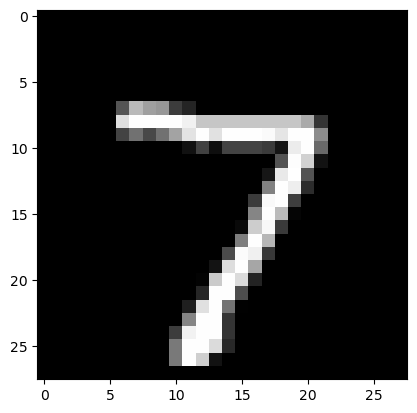

In [62]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [65]:

# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
fig, axes = plt.subplots(2, 4, figsize=(12, 8))  # 2 rows and 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i in range(8):
    img = train_data[i][0]
    print(f"Image shape: {img.shape}")
    
    # Squeeze only if necessary
    img_sq = img.squeeze() if img.ndim > 2 else img
    print(f"Image_squeeze shape: {img_sq.shape}")
    
    label = train_data[i][1]
    
    # Display the image in the appropriate subplot
    axes[i].imshow(img_sq, cmap='gray')
    axes[i].set_title(label)
    axes[i].axis('off')  # Hide the axes

# Hide any unused subplots
for j in range(5, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


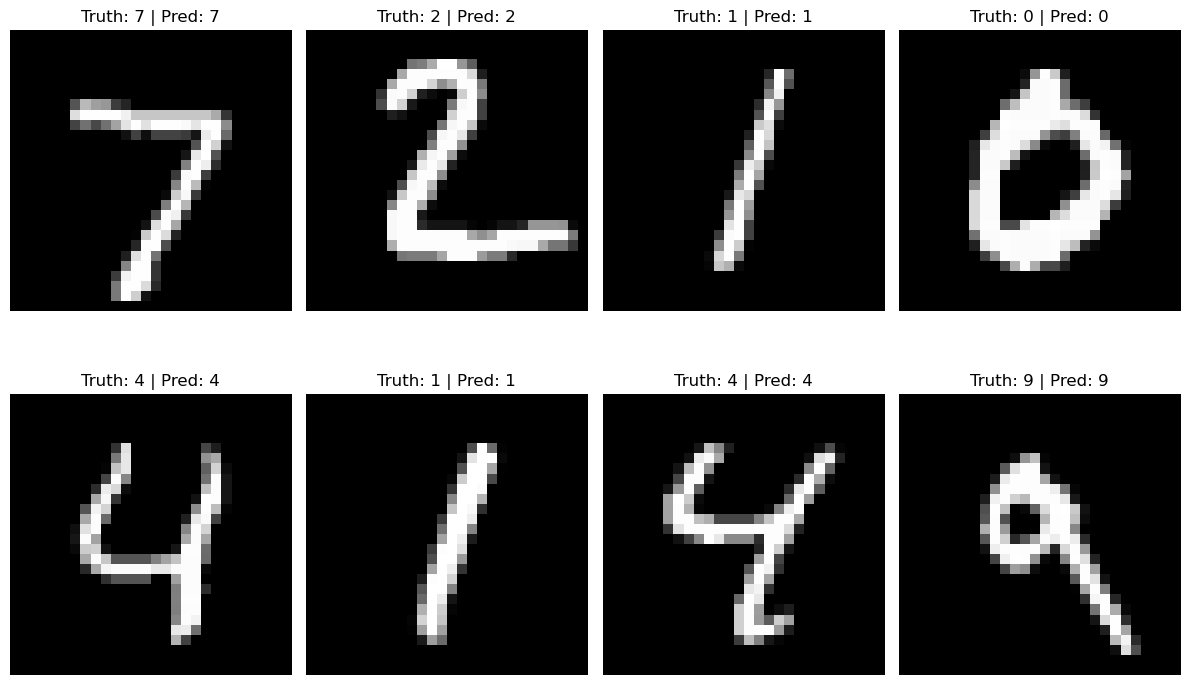

In [71]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))  # 2 rows and 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i in range(8):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]

    # Make prediction on image
    model_pred_logits = model(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plot the image and prediction
    axes[i].imshow(img.squeeze(),cmap='gray')
    axes[i].set_title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    axes[i].axis('off')  # Hide the axes
# Hide any unused subplots
for j in range(5, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [81]:
model.eval()
y_preds = []
with torch.inference_mode():
    for batch, (x, y) in tqdm(enumerate(test_dataloader)):
        x, y = x.to(device), y.to(device)  
        y_pred_logits = model(x)  
        y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
        y_preds.append(y_pred_labels)
    y_preds = torch.cat(y_preds).cpu()


len(y_preds)

0it [00:00, ?it/s]

10000

In [80]:
len(test_dataloader)

313

In [82]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

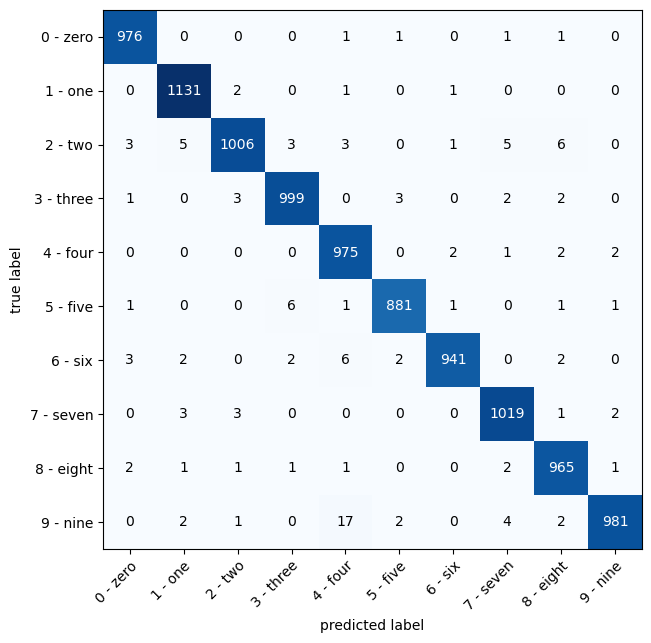

In [84]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [85]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True) # if models directory already exists, don't error


# Create model save path
MODEL_NAME = "MNIST.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\MNIST.pth
